In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('../Dataset/Random Forest/TaxiFare.csv')
data.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
data['date_time_of_pickup']=pd.to_datetime(data['date_time_of_pickup'])
data['year']=data['date_time_of_pickup'].dt.year
data['month']=data['date_time_of_pickup'].dt.month
data['day']=data['date_time_of_pickup'].dt.day
data_n=data.drop(columns=['unique_id','amount','date_time_of_pickup'],axis=1)
x=data_n.iloc[:,:].values
y=data['amount']
x[:5]

array([[-7.3844311e+01,  4.0721319e+01, -7.3841610e+01,  4.0712278e+01,
         1.0000000e+00,  2.0090000e+03,  6.0000000e+00,  1.5000000e+01],
       [-7.4016048e+01,  4.0711303e+01, -7.3979268e+01,  4.0782004e+01,
         1.0000000e+00,  2.0100000e+03,  1.0000000e+00,  5.0000000e+00],
       [-7.3982738e+01,  4.0761270e+01, -7.3991242e+01,  4.0750562e+01,
         2.0000000e+00,  2.0110000e+03,  8.0000000e+00,  1.8000000e+01],
       [-7.3987130e+01,  4.0733143e+01, -7.3991567e+01,  4.0758092e+01,
         1.0000000e+00,  2.0120000e+03,  4.0000000e+00,  2.1000000e+01],
       [-7.3968095e+01,  4.0768008e+01, -7.3956655e+01,  4.0783762e+01,
         1.0000000e+00,  2.0100000e+03,  3.0000000e+00,  9.0000000e+00]])

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=400,max_depth=40,min_samples_split=2,min_samples_leaf=2,criterion='squared_error')
rf.fit(x_train,y_train)

In [21]:
y_pred=rf.predict(x_test)
#in this we don't need y_pred as we can use inbuilt .score() function which will give us by comparing   
score=rf.score(x_test,y_test)
print(score)
#with r2_score we can get regression score i.e. same as accuracy_score   
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,y_pred)
print(accuracy)

0.7527641106726298
0.7527641106726298


<BarContainer object of 8 artists>

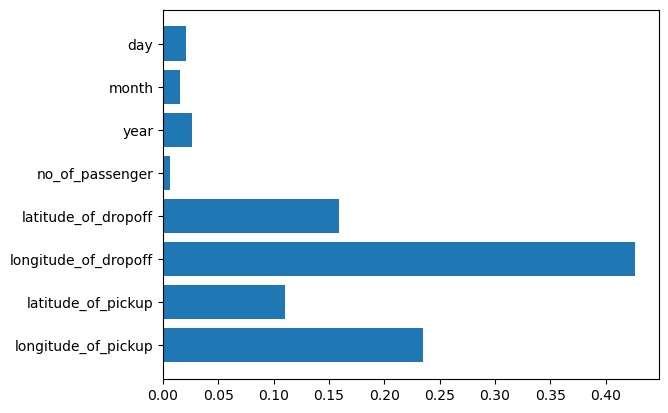

In [22]:
plt.barh(data_n.columns,rf.feature_importances_)

In [ ]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'n_estimators': [100, 200, 300],          
#     'max_features': ['auto', 'sqrt'],         
#     'max_depth': [None, 10, 20, 30],         
#     'min_samples_split': [2, 5, 10],         
#     'min_samples_leaf': [1, 2, 4]            
# }


# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
#                            cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# grid_search.fit(x_train,y_train)
# print(grid_search.best_params_)
# grid_search.best_score_